# **Imports**

In [2]:
from Network import SoftQNetwork, QNetwork
from Agent import DQNAgent, SoftDQNAgent
import config
from Replay import ReplayBuffer, ExpertReplayBuffer

Mounted at /content/drive
/content/drive/MyDrive/CompSci 691NR/Modularized Copy of Project
/content/drive/MyDrive/CompSci 691NR/Modularized Copy of Project
Agent.py		    Network.py		    Replay.py
baseline_2		    ogDQN.txt		    solved_200.pth
BenchmarkLunarLander.ipynb  OgLunarLanderDQN.ipynb  solved_baseline.pth
config.py		    ourAlg		    solved_OurAlg.pth
expert			    OurLunarLander.ipynb
ExpertLunarLander.ipynb     __pycache__


In [3]:
from io import IncrementalNewlineDecoder
import random
import sys
from time import time
from collections import deque, defaultdict, namedtuple
import numpy as np
import pandas as pd
import gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from IPython.display import display, clear_output

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

#**Gym Environment**

In [4]:
env = gym.make('LunarLander-v2')
env.reset(seed = 0)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#**Train**

In [5]:
# Only changing env_solved variable wrt the config file
ENV_SOLVED = 300     # MAX score at which we consider environment to be solved

In [6]:
# Get state and action sizes
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
# del dqn_agent

# Training

In [8]:
start = time()
avg_scores = []
for exp in range(5):
    dqn_agent = SoftDQNAgent(state_size, action_size, seed=0, algo = "expert")
    scores = []
    # Maintain a list of last 100 scores
    scores_window = deque(maxlen=100)
    # eps = EPS_START
    for episode in range(1, config.MAX_EPISODES + 1):
        state = env.reset()
        score = 0
        for t in range(config.MAX_STEPS):
            action = dqn_agent.act(state)
            next_state, reward, done, truncated, info = env.step(action)
            dqn_agent.step(state, action, reward, next_state, done)
            state = next_state        
            score += reward        
            if done:
                break

            if episode % config.PRINT_EVERY == 0:
                mean_score = np.mean(scores_window)
                print('\r Progress {}/{}, average score:{:.2f}'.format(episode, config.MAX_EPISODES, mean_score), end="")
            if score >= ENV_SOLVED:
                mean_score = np.mean(scores_window)
                print('\rEnvironment solved in {} episodes, average score: {:.2f}'.format(episode, mean_score), end="")
                # sys.stdout.flush()
                # dqn_agent.checkpoint('solved_200.pth')
                break
                
        scores_window.append(score)
        scores.append(score)
    avg_scores.append(scores)
    del dqn_agent

end = time()    
print('Took {} seconds'.format(end - start))

Streaming output truncated to the last 5000 lines.
tensor([[nan, nan, nan, nan]])
distribution is nan after exp
distribution is nan after normalization
tensor([[nan, nan, nan, nan]])
distribution is nan after exp
distribution is nan after normalization
tensor([[nan, nan, nan, nan]])
distribution is nan after exp
distribution is nan after normalization
tensor([[nan, nan, nan, nan]])
distribution is nan after exp
distribution is nan after normalization
tensor([[nan, nan, nan, nan]])
distribution is nan after exp
distribution is nan after normalization
tensor([[nan, nan, nan, nan]])
distribution is nan after exp
distribution is nan after normalization
tensor([[nan, nan, nan, nan]])
distribution is nan after exp
distribution is nan after normalization
tensor([[nan, nan, nan, nan]])
distribution is nan after exp
distribution is nan after normalization
tensor([[nan, nan, nan, nan]])
distribution is nan after exp
distribution is nan after normalization
tensor([[nan, nan, nan, nan]])
distribut

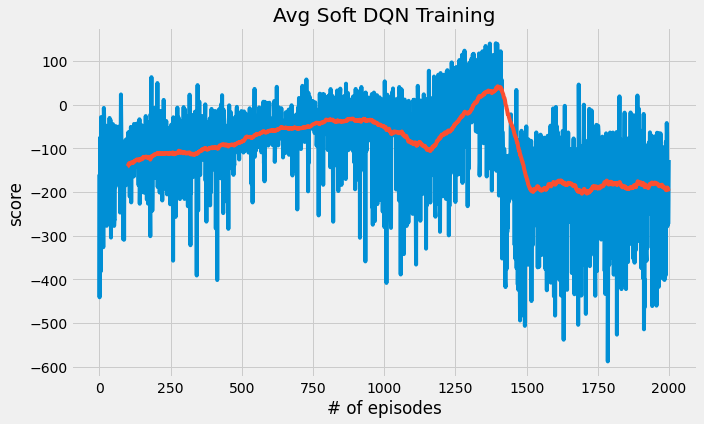

In [9]:
plt.figure(figsize=(10,6))
plt.plot(avg_scores[-1])
# A bit hard to see the above plot, so lets smooth it (red)
plt.plot(pd.Series(avg_scores[-1]).rolling(100).mean())
plt.title('Avg Soft DQN Training')
plt.xlabel('# of episodes')
plt.ylabel('score')
plt.show()

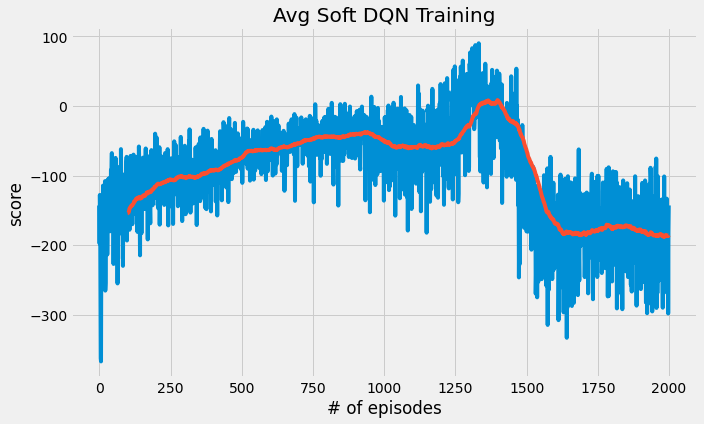

In [10]:
plt.figure(figsize=(10,6))
plt.plot(np.mean(avg_scores, axis=0))
# A bit hard to see the above plot, so lets smooth it (red)
plt.plot(pd.Series(np.mean(avg_scores, axis=0)).rolling(100).mean())
plt.title('Avg Soft DQN Training')
plt.xlabel('# of episodes')
plt.ylabel('score')
plt.show()

In [11]:
textfile = open("expertScores.txt", "w")
textfile.write(str(avg_scores))
textfile.close()

In [ ]:
dqn_agent.checkpoint('solved_200.pth')
torch.save(dqn_agent.q_network.state_dict(),'./expert')